In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Simple Linear Regression

In [46]:
np.random.seed(42)
X = np.random.rand(100, 1)  # One-dimensional array
y = 4 + 3 * X + np.random.randn(100, 1) * 0.5

In [47]:
# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [48]:
# Gradient Descent
def gradient_descent(X, y, theta, learning_rate=0.1, iterations=1000):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

In [49]:
learning_rate = 0.1
iterations = 1000
theta_final, cost_history = gradient_descent(X_b, y, theta, learning_rate, iterations)

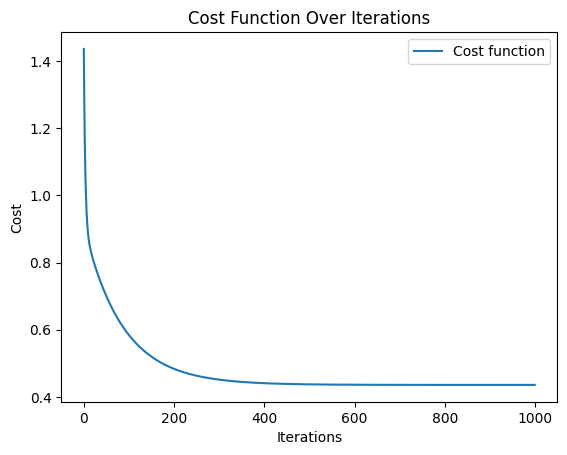

In [50]:
plt.plot(range(iterations), cost_history, label='Cost function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.legend()
plt.show()

# Multiple Regression

In [51]:
np.random.seed(42)
X = np.random.rand(100, 2)  # Two features
y = 4 + 3 * X[:, 0] + 2 * X[:, 1] + np.random.randn(100) * 0.5

In [52]:
y = y.reshape(-1, 1)

In [53]:
m = len(y)
X_b = np.c_[np.ones((m, 1)), X]

In [54]:
theta = np.random.randn(3, 1)

In [55]:
# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [56]:
# Gradient Descent function
def gradient_descent(X, y, theta, learning_rate=0.1, iterations=1000):
    m = len(y)
    cost_history = []
    theta_history = []

    for i in range(iterations):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)  # Ensure matrix multiplication
        theta -= learning_rate * gradients  # Update theta
        cost_history.append(compute_cost(X, y, theta))
        theta_history.append(theta.copy())

    return theta, cost_history, np.array(theta_history)

In [57]:
learning_rate = 0.1
iterations = 1000
theta_final, cost_history, theta_history = gradient_descent(X_b, y, theta, learning_rate, iterations)

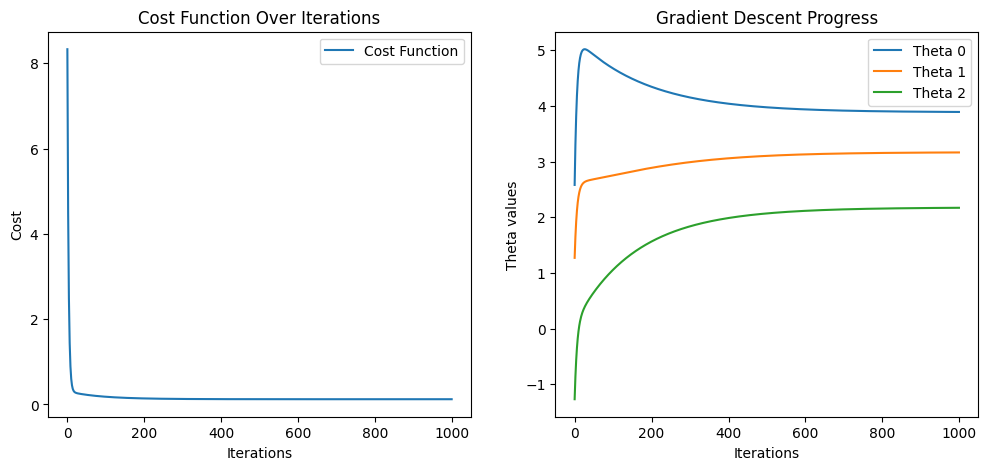

Final theta values: [[3.89184983]
 [3.16478982]
 [2.17087247]]
Final cost: 0.12267553582536771


In [58]:
# Plot cost function over iterations
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(iterations), cost_history, label='Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.legend()

# Plot gradient descent progress
theta_history = np.array(theta_history)
plt.subplot(1, 2, 2)
plt.plot(theta_history[:, 0], label='Theta 0')
plt.plot(theta_history[:, 1], label='Theta 1')
plt.plot(theta_history[:, 2], label='Theta 2')
plt.xlabel('Iterations')
plt.ylabel('Theta values')
plt.title('Gradient Descent Progress')
plt.legend()

plt.show()

# Print final parameters
print("Final theta values:", theta_final)
print("Final cost:", compute_cost(X_b, y, theta_final))